In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
dt = 0.01
A = [[0,1,1,0],
     [1,0,0,1],
     [1,0,0,0],
     [0,1,0,0]]

B = [1,0,0,0]
lamda = [0.1729,0.6617,2.2091,3.9563]
k = 1 / (4* 0.5 * (1-0.5*0.5)*lamda[0])
class VehicleState:
    def __init__(self, x=0.0, y=0.0, yaw=0.0, v=0.0):
        self.x = x
        self.v = v

def update(state, a):
    state.x = state.x + state.v * dt
    state.v = state.v + a * dt
    return state

def update_follower(state,v):
    state.v = v
    state.x = state.x + state.v * dt
    return state
    
def controller(leader,fol_1,fol_2,fol_3,fol_4,k):
    v = leader.v
    x = [fol_1.x,fol_2.x,fol_3.x,fol_4.x]
    u = [0,0,0,0]
    for i in range(0,4):
        sigma = 0
        for j in range(0,4):
            a_ij = A[i][j] 
            b_i0 = B[i]
            sigma = sigma +  a_ij * (x[i] - x[j]) + b_i0 * (x[i] -leader.x)
        u[i] = (-k) * sigma + v
    return u


In [12]:
k = 1 / (4* 0.5 * (1-0.5*0.5)*lamda[0]) +3

In [13]:
k

6.855793329477541

In [3]:
k = 1 / (4* 0.5 * (1-0.5*0.5)*lamda[0]) +3

i = 0
time = 0
T = 2 # 模拟时间
t = [0.0]
# 设置车辆的初始状态 leader
leader = VehicleState(x=0, v=0.0)
leader_x = [leader.x]
leader_v = [leader.v]
# 设置车辆的初始状态 follower
follower_1 = VehicleState(x=13, v=0.0)
follower_2 = VehicleState(x=10, v=0.0)
follower_3 = VehicleState(x=-5, v=0.0)
follower_4 = VehicleState(x=-10, v=0.0)
follower = [[follower_1.x,follower_1.v,follower_2.x,follower_2.v,follower_3.x,follower_3.v,follower_4.x,follower_4.v]]
#初始化加速度
a = []
for n in range(0,int(T/dt)+100):
    if n<50:
        a.append( 1 )
    else:
        a.append( 0 )
#进行多轮迭代更新
while T >= time :
    
    leader = update(leader,a[i])
    v = controller(leader,follower_1,follower_2,follower_3,follower_4,k)

    follower_1 = update_follower(follower_1,v[0])
    follower_2 = update_follower(follower_2,v[1])
    follower_3 = update_follower(follower_3,v[2])
    follower_4 = update_follower(follower_4,v[3])
    print(v)
#     print(follower_1.x)
    
    leader_x.append(leader.x)
    leader_v.append(leader.v)
    follower.append([follower_1.x,follower_1.v,follower_2.x,follower_2.v,follower_3.x,follower_3.v,follower_4.x,follower_4.v])
    t.append(time)   
    time = time + dt
    i = i + 1
follower = np.array(follower)

[-500.4629130518605, -116.53848660111818, 123.41427993059574, 137.1258665895508]
[-294.1145624969871, -125.45884801465483, 80.65254894997277, 119.74516278424257]
[-176.18758578464272, -120.20085502195508, 54.96929032231643, 102.94448256828038]
[-108.16715957249268, -108.73080640542445, 39.13165262954686, 87.65609939872887]
[-68.42346298116728, -95.21828355536204, 29.04315048819979, 74.20221901064038]
[-44.790754487937306, -81.75616652010358, 22.371040903499264, 62.59709949695307]
[-30.411052714231577, -69.3153326853081, 17.7765670150958, 52.710537914472724]
[-21.40573421138539, -58.2722941573531, 14.48292339605857, 44.35469641765606]
[-15.57070704326497, -48.69890462568457, 12.032471201768393, 37.32880204357103]
[-11.644828115165126, -40.51982209031958, 10.150054348921598, 31.4409202682377]
[-8.899421357948102, -33.59673240502342, 8.665842250781271, 26.517440493777208]
[-6.907710556550471, -27.77223234603113, 7.471604079988857, 22.40613703811064]
[-5.415101709740719, -22.89167855188193

Text(0.5,1,'The iteration period is 10ms')

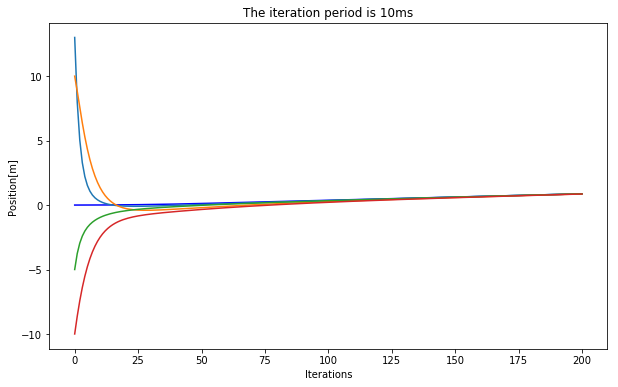

In [11]:
plt.figure(figsize=(10,6))

plt.plot(leader_x,"-b", label="trajectory")
plt.plot(follower[:,0])
plt.plot(follower[:,2])
plt.plot(follower[:,4], label="trajectory")
plt.plot(follower[:,6], label="trajectory")
plt.xlabel('Iterations')             
plt.ylabel('Position[m]')
plt.title("The iteration period is 10ms")

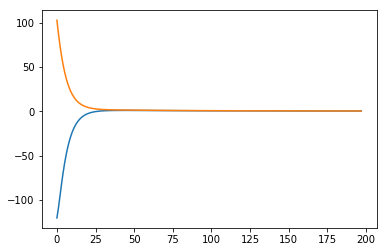

In [5]:
# plt.plot(leader_v,"-b", label="trajectory")
# plt.plot(follower[:,1], label="trajectory")
plt.plot(follower[3:,3], label="trajectory")
# plt.plot(follower[:,5], label="trajectory")
plt.plot(follower[3:,7], label="trajectory")

In [6]:
follower[:,1]

array([ 0.00000000e+00, -5.00462913e+02, -2.94114562e+02, -1.76187586e+02,
       -1.08167160e+02, -6.84234630e+01, -4.47907545e+01, -3.04110527e+01,
       -2.14057342e+01, -1.55707070e+01, -1.16448281e+01, -8.89942136e+00,
       -6.90771056e+00, -5.41510171e+00, -4.26603087e+00, -3.36256818e+00,
       -2.64087441e+00, -2.05771361e+00, -1.58264721e+00, -1.19345154e+00,
       -8.73375695e-01, -6.09459372e-01, -3.91468851e-01, -2.11199560e-01,
       -6.20010180e-02,  6.15595199e-02,  1.63943919e-01,  2.48830065e-01,
        3.19257015e-01,  3.77739945e-01,  4.26362532e-01,  4.66851983e-01,
        5.00640422e-01,  5.28915384e-01,  5.52661490e-01,  5.72694928e-01,
        5.89692034e-01,  6.04213002e-01,  6.16721568e-01,  6.27601363e-01,
        6.37169500e-01,  6.45687867e-01,  6.53372510e-01,  6.60401431e-01,
        6.66921074e-01,  6.73051712e-01,  6.78891922e-01,  6.84522308e-01,
        6.90008588e-01,  6.95404166e-01,  7.00752263e-01,  6.96087683e-01,
        6.91438290e-01,  